In [2]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from transformers import BertTokenizer, BertModel
import torch




In [3]:
path = '../data/data_clean.pkl'
df = pd.read_pickle(path)
df.head()


,contract,paragraph,paragraph_title,paragraph_content,section,section_content,clean_paragraph_content,clean_section_content,paragraph_content_stemm,paragraph_content_lemma,paragraph_content_token,section_content_stemm,paragraph_section_lemma,paragraph_section_token
0,1,§ 1,Vertragsgegenstand,§ 1 Vertragsgegenstand 1.1 Der Anbieter stellt...,1.1,1.1 Der Anbieter stellt dem Kunden die Softwar...,Der Anbieter stellt dem Kunden die Software Na...,Der Anbieter stellt dem Kunden die Software Na...,der anbiet stellt dem kunden die softwar name ...,Der Anbieter stellt dem Kunden die Software Na...,"[der, an, ##bie, ##ter, ste, ##ll, ##t, dem, k...",der anbiet stellt dem kunden die softwar name ...,Der Anbieter stellt dem Kunden die Software Na...,"[der, an, ##bie, ##ter, ste, ##ll, ##t, dem, k..."
1,1,§ 1,Vertragsgegenstand,§ 1 Vertragsgegenstand 1.1 Der Anbieter stellt...,1.2,1.2 Die Nutzung umfasst die Bereitstellung von...,Der Anbieter stellt dem Kunden die Software Na...,Die Nutzung umfasst die Bereitstellung von Fun...,der anbiet stellt dem kunden die softwar name ...,Der Anbieter stellt dem Kunden die Software Na...,"[der, an, ##bie, ##ter, ste, ##ll, ##t, dem, k...",die nutzung umfasst die bereitstellung von fun...,die Nutzung umfasst die Bereitstellung von Fun...,"[die, nut, ##zu, ##ng, um, ##fa, ##ss, ##t, di..."
2,1,§ 1,Vertragsgegenstand,§ 1 Vertragsgegenstand 1.1 Der Anbieter stellt...,1.3,1.3 Der Kunde erhält ausschließlich das vertra...,Der Anbieter stellt dem Kunden die Software Na...,Der Kunde erhält ausschließlich das vertraglic...,der anbiet stellt dem kunden die softwar name ...,Der Anbieter stellt dem Kunden die Software Na...,"[der, an, ##bie, ##ter, ste, ##ll, ##t, dem, k...",der kund erhält ausschließlich da vertraglich ...,Der Kunde erhält ausschließlich das vertraglic...,"[der, kun, ##de, er, ##hal, ##t, aus, ##sch, #..."
3,2,§ 1,Vertragsgegenstand,§ 1 Vertragsgegenstand (1) Dieser Software-as-...,(1),(1) Dieser Software-as-a-Service-Vertrag ist a...,1 Dieser SoftwareasaServiceVertrag ist auf On ...,1 Dieser SoftwareasaServiceVertrag ist auf On ...,1 dieser softwareasaservicevertrag ist auf on ...,1 Dieser softwareasaservicevertrag ist auf on ...,"[1, dies, ##er, software, ##asa, ##ser, ##vic,...",1 dieser softwareasaservicevertrag ist auf on ...,1 Dieser softwareasaservicevertrag ist auf on ...,"[1, dies, ##er, software, ##asa, ##ser, ##vic,..."
4,2,§ 1,Vertragsgegenstand,§ 1 Vertragsgegenstand (1) Dieser Software-as-...,(2),(2) Die Software wird vom Anbieter als webbasi...,1 Dieser SoftwareasaServiceVertrag ist auf On ...,2 Die Software wird vom Anbieter als webbasier...,1 dieser softwareasaservicevertrag ist auf on ...,1 Dieser softwareasaservicevertrag ist auf on ...,"[1, dies, ##er, software, ##asa, ##ser, ##vic,...",2 die softwar wird vom anbiet al webbasiert sa...,2 die Software wird vom Anbieter al webbasiert...,"[2, die, software, wi, ##rd, vo, ##m, an, ##bi..."


# 1 Loading the model and tokenizer

In [4]:
bert_cased = BertTokenizer.from_pretrained('bert-base-cased')
model = BertModel.from_pretrained('bert-base-cased')


# 2. Appling the tokenizer on each of the cleand columns
This will give us a list of token-IDs for every toeken in every entity in each coumn as a list


In [5]:
df['tokens_paragraph_title'] = df['paragraph_title'].apply(lambda x: bert_cased.tokenize(str(x)))
df['bert_quick_paragraph_titel']=df['paragraph_title'].apply(lambda x: [bert_cased.encode(x)])
df['bert_quick_paragraph_content']=df['clean_paragraph_content'].apply(lambda x: [bert_cased.encode(x)])
df['bert_quick_section_content']=df['clean_section_content'].apply(lambda x: [bert_cased.encode(x)])
print("Clean content:")
print(df["paragraph_title"][0:10])
print("\n\n--> transformed to tokens (left out since we are using IDs):")
print(df['tokens_paragraph_title'][0:10])
print("\n\n--> transformed to Ids:")
print(df[["bert_quick_paragraph_titel"]][0:10])

Token indices sequence length is longer than the specified maximum sequence length for this model (945 > 512). Running this sequence through the model will result in indexing errors


Clean content:
0                                   Vertragsgegenstand
1                                   Vertragsgegenstand
2                                   Vertragsgegenstand
3                                   Vertragsgegenstand
4                                   Vertragsgegenstand
5                                   Vertragsgegenstand
6    Registrierung, Zustandekommen des Nutzungsvert...
7    Registrierung, Zustandekommen des Nutzungsvert...
8                          Art und Umfang der Leistung
9                          Art und Umfang der Leistung
Name: paragraph_title, dtype: object


--> transformed to tokens (left out since we are using IDs):
0     [V, ##ert, ##rag, ##s, ##ge, ##gens, ##tan, ##d]
1     [V, ##ert, ##rag, ##s, ##ge, ##gens, ##tan, ##d]
2     [V, ##ert, ##rag, ##s, ##ge, ##gens, ##tan, ##d]
3     [V, ##ert, ##rag, ##s, ##ge, ##gens, ##tan, ##d]
4     [V, ##ert, ##rag, ##s, ##ge, ##gens, ##tan, ##d]
5     [V, ##ert, ##rag, ##s, ##ge, ##gens, ##tan, ##d]
6    

Since Bert needs torch-tensors we simmply transform the lsit to torch tensors:


In [6]:
inputs_paragraph_title = df['bert_quick_paragraph_titel'].apply(lambda x: torch.tensor(x))
inputs_paragraph_content = df['bert_quick_paragraph_content'].apply(lambda x: torch.tensor(x))
inputs_section_content = df['bert_quick_section_content'].apply(lambda x: torch.tensor(x))
print(f'torch tensor for "{df["paragraph_title"][1]}":')
print(inputs_paragraph_title[1])

torch tensor for "Vertragsgegenstand":
tensor([[  101,   159,  7340, 20484,  1116,  2176, 21144,  5108,  1181,   102]])


# 3. Structure of the model
## 3.1 Word embeddings

In [7]:
print(model.embeddings.word_embeddings)
print(f'--> {model.embeddings.word_embeddings.weight.shape[0]} tokens in the vocabulary')
print(f'--> {model.embeddings.word_embeddings.weight.shape[1]} dimensions per emabding verctor')

Embedding(28996, 768, padding_idx=0)
--> 28996 tokens in the vocabulary
--> 768 dimensions per emabding verctor


## 3.2 Position embeddings

In [8]:
print(model.embeddings.position_embeddings)
print(f'--> {model.embeddings.position_embeddings.weight.shape[0]} maximum chunk length')
print(f'--> {model.embeddings.position_embeddings.weight.shape[1]} dimensions per emabding verctor')

Embedding(512, 768)
--> 512 maximum chunk length
--> 768 dimensions per emabding verctor


## 3.3 Transformer Layers

In [9]:
print(len(model.encoder.layer))
print('--> Number of transformer layers')

12
--> Number of transformer layers


## 3.4 Structure of the first layer
TO BE DONE


In [10]:
print(model.encoder.layer[0])

BertLayer(
  (attention): BertAttention(
    (self): BertSdpaSelfAttention(
      (query): Linear(in_features=768, out_features=768, bias=True)
      (key): Linear(in_features=768, out_features=768, bias=True)
      (value): Linear(in_features=768, out_features=768, bias=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (output): BertSelfOutput(
      (dense): Linear(in_features=768, out_features=768, bias=True)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
  )
  (intermediate): BertIntermediate(
    (dense): Linear(in_features=768, out_features=3072, bias=True)
    (intermediate_act_fn): GELUActivation()
  )
  (output): BertOutput(
    (dense): Linear(in_features=3072, out_features=768, bias=True)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
)


## 3.5 Pooler
TO BE DONE

In [11]:
print(model.pooler)

BertPooler(
  (dense): Linear(in_features=768, out_features=768, bias=True)
  (activation): Tanh()
)


# 4. First run of BERT


In [12]:
with torch.no_grad():
 outputs = model(inputs_paragraph_title[0] , output_attentions=True)
 embeddings_all = outputs.last_hidden_state.numpy()
 embeddings = outputs.last_hidden_state[0] [0].numpy()

print(embeddings_all.shape)
print(f"--> 1st input has {embeddings_all.shape[0]} sentence and {embeddings_all.shape[1]} tokens with {embeddings_all.shape[2]}-dimanisonal embeddings")
print(embeddings.shape)
print(f"--> the CLS-Token (for the sentence) has a {embeddings.shape[0]}-dimensional embedding")


BertSdpaSelfAttention is used but `torch.nn.functional.scaled_dot_product_attention` does not support non-absolute `position_embedding_type` or `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


(1, 10, 768)
--> 1st input has 1 sentence and 10 tokens with 768-dimanisonal embeddings
(768,)
--> the CLS-Token (for the sentence) has a 768-dimensional embedding


# 4.1 Attentionsheads of BERT



In [51]:
attention_weights = outputs.attentions
#head_view(attention_weights,
#tokens=bert_cased.convert_ids_to_tokens(inputs_paragraph_title[0][0]))

## 4.2 Calculation of the CLS ebadings in BERT

In [14]:
def prepare_apply_model(tokenizer, text, model):
  input=torch.tensor([tokenizer.encode(text)])
  with torch.no_grad():
   outputs = model(input)
  embeddings = outputs.last_hidden_state[0][0].numpy()
  return embeddings

bert_1st_emb = prepare_apply_model(bert_cased, df["paragraph_title"].loc[0], model)
print("First 10 dimensions of the BERT-embedding of the first sentence:")
print(bert_1st_emb[0:9])

First 10 dimensions of the BERT-embedding of the first sentence:
[ 0.37478474  0.08961661 -0.12682869 -0.26694614 -0.05042038  0.10338304
  0.3454303  -0.09266943 -0.08774802]


# 4. First run of SBERT

In [15]:
model_sbert_bert = SentenceTransformer("bert-base-nli-cls-token")


In [16]:

embedding = model_sbert_bert.encode(df["paragraph_title"][0], convert_to_tensor=True)

print(embedding.shape)
print(f"--> The sentence vector has {embedding.shape[0]} dimensionen.")

torch.Size([768])
--> The sentence vector has 768 dimensionen.


In [17]:
def prepare_apply_model_SBERT(model, text):
  with torch.no_grad():
    embeddings = model.encode(text, convert_to_tensor=True)
  return embeddings
s_bert_1st_emb = prepare_apply_model_SBERT(model_sbert_bert, df["paragraph_title"].loc[0]).numpy()
print("First 10 dimensions of the BERT-embedding of the paragraph title:")
print(bert_1st_emb[0:9])
print("\n     VS.     \n\nFirst 10 dimensions of the SBERT-embedding of the first paragraph title:")
print(s_bert_1st_emb[0:9])
are_equal = np.array_equal(s_bert_1st_emb, bert_1st_emb)

print(f"\n\n-->The embeddings for BERT's sentence vector and SBERT's vector are {'equal' if are_equal else 'not equal'}!")

First 10 dimensions of the BERT-embedding of the paragraph title:
[ 0.37478474  0.08961661 -0.12682869 -0.26694614 -0.05042038  0.10338304
  0.3454303  -0.09266943 -0.08774802]

     VS.     

First 10 dimensions of the SBERT-embedding of the first paragraph title:
[-0.4799695   0.06948653  0.9682909  -0.17585222  0.36066523  0.17929685
  0.37011197  0.66411394 -0.12231008]


-->The embeddings for BERT's sentence vector and SBERT's vector are not equal!


Since SBERT is Finetuned for recognizing semantic similarity for Sentences and paragraphs we want to use SBERT as a model. How ever we need to adjust the underlaying model so that it can fit better to german contract langauge.

# 5 Loading the GERMAN model and tokenizer

In [18]:
g_bert_cased = BertTokenizer.from_pretrained('deepset/gbert-base')
model_g_bert = BertModel.from_pretrained('deepset/gbert-base')


# 7. Comparison GERMAN-BERT & generic BERT
This will give us a list of token-IDs for every toeken in every entity in each coumn as a list


In [20]:
df['tokens_paragraph_title_gbert'] = df['paragraph_title'].apply(lambda x: g_bert_cased.tokenize(str(x)))
df['gbert_quick_paragraph_titel']=df['paragraph_title'].apply(lambda x: [g_bert_cased.encode(x)])
df['gbert_quick_paragraph_content']=df['clean_paragraph_content'].apply(lambda x: [g_bert_cased.encode(x)])
df['gbert_quick_section_content']=df['clean_section_content'].apply(lambda x: [g_bert_cased.encode(x)])
print("Clean content:")
display(df["paragraph_title"][0:10])
print("\n\n--> transformed to tokens (left out since we are using IDs):")
pd.set_option('display.max_colwidth', None)
display(df[[ 'tokens_paragraph_title_gbert','tokens_paragraph_title']].head(10))
print("\n\n--> transformed to Ids:")
display(df[[ "gbert_quick_paragraph_titel","bert_quick_paragraph_titel"]].head(10))

Clean content:


0                                   Vertragsgegenstand
1                                   Vertragsgegenstand
2                                   Vertragsgegenstand
3                                   Vertragsgegenstand
4                                   Vertragsgegenstand
5                                   Vertragsgegenstand
6    Registrierung, Zustandekommen des Nutzungsvert...
7    Registrierung, Zustandekommen des Nutzungsvert...
8                          Art und Umfang der Leistung
9                          Art und Umfang der Leistung
Name: paragraph_title, dtype: object



--> transformed to tokens (left out since we are using IDs):


,tokens_paragraph_title_gbert,tokens_paragraph_title
0,"[Vertrags, ##gegen, ##stand]","[V, ##ert, ##rag, ##s, ##ge, ##gens, ##tan, ##d]"
1,"[Vertrags, ##gegen, ##stand]","[V, ##ert, ##rag, ##s, ##ge, ##gens, ##tan, ##d]"
2,"[Vertrags, ##gegen, ##stand]","[V, ##ert, ##rag, ##s, ##ge, ##gens, ##tan, ##d]"
3,"[Vertrags, ##gegen, ##stand]","[V, ##ert, ##rag, ##s, ##ge, ##gens, ##tan, ##d]"
4,"[Vertrags, ##gegen, ##stand]","[V, ##ert, ##rag, ##s, ##ge, ##gens, ##tan, ##d]"
5,"[Vertrags, ##gegen, ##stand]","[V, ##ert, ##rag, ##s, ##ge, ##gens, ##tan, ##d]"
6,"[Registrierung, ,, Zustand, ##ek, ##ommen, des, Nutzungs, ##vertrags]","[Regis, ##tri, ##er, ##ung, ,, Z, ##ust, ##and, ##ek, ##om, ##men, des, N, ##utz, ##ung, ##s, ##vert, ##rag, ##s]"
7,"[Registrierung, ,, Zustand, ##ek, ##ommen, des, Nutzungs, ##vertrags]","[Regis, ##tri, ##er, ##ung, ,, Z, ##ust, ##and, ##ek, ##om, ##men, des, N, ##utz, ##ung, ##s, ##vert, ##rag, ##s]"
8,"[Art, und, Umfang, der, Leistung]","[Art, und, Um, ##fan, ##g, der, Le, ##ist, ##ung]"
9,"[Art, und, Umfang, der, Leistung]","[Art, und, Um, ##fan, ##g, der, Le, ##ist, ##ung]"




--> transformed to Ids:


,gbert_quick_paragraph_titel,bert_quick_paragraph_titel
0,"[[102, 7545, 1789, 858, 103]]","[[101, 159, 7340, 20484, 1116, 2176, 21144, 5108, 1181, 102]]"
1,"[[102, 7545, 1789, 858, 103]]","[[101, 159, 7340, 20484, 1116, 2176, 21144, 5108, 1181, 102]]"
2,"[[102, 7545, 1789, 858, 103]]","[[101, 159, 7340, 20484, 1116, 2176, 21144, 5108, 1181, 102]]"
3,"[[102, 7545, 1789, 858, 103]]","[[101, 159, 7340, 20484, 1116, 2176, 21144, 5108, 1181, 102]]"
4,"[[102, 7545, 1789, 858, 103]]","[[101, 159, 7340, 20484, 1116, 2176, 21144, 5108, 1181, 102]]"
5,"[[102, 7545, 1789, 858, 103]]","[[101, 159, 7340, 20484, 1116, 2176, 21144, 5108, 1181, 102]]"
6,"[[102, 18304, 818, 6432, 1201, 444, 222, 18542, 26381, 103]]","[[101, 25510, 19091, 1200, 4380, 117, 163, 8954, 5709, 4820, 4165, 2354, 3532, 151, 27578, 4380, 1116, 12986, 20484, 1116, 102]]"
7,"[[102, 18304, 818, 6432, 1201, 444, 222, 18542, 26381, 103]]","[[101, 25510, 19091, 1200, 4380, 117, 163, 8954, 5709, 4820, 4165, 2354, 3532, 151, 27578, 4380, 1116, 12986, 20484, 1116, 102]]"
8,"[[102, 1622, 136, 7661, 125, 4970, 103]]","[[101, 2051, 5576, 12189, 16740, 1403, 4167, 3180, 1776, 4380, 102]]"
9,"[[102, 1622, 136, 7661, 125, 4970, 103]]","[[101, 2051, 5576, 12189, 16740, 1403, 4167, 3180, 1776, 4380, 102]]"


Since Bert needs torch-tensors we simmply transform the lsit to torch tensors:


In [21]:
inputs_paragraph_title_gbert = df['gbert_quick_paragraph_titel'].apply(lambda x: torch.tensor(x))
inputs_paragraph_content_gbert = df['gbert_quick_paragraph_content'].apply(lambda x: torch.tensor(x))
inputs_section_content_gbert = df['gbert_quick_section_content'].apply(lambda x: torch.tensor(x))
print(f'Leagal torch tensor for "{df["paragraph_title"][1]}":')
print(inputs_paragraph_title_gbert[1])

Leagal torch tensor for "Vertragsgegenstand":
tensor([[ 102, 7545, 1789,  858,  103]])


# 8. Structure of the german model
## 8.1 Word embeddings

In [22]:
print(model_g_bert.embeddings.word_embeddings)
print(f'--> {model_g_bert.embeddings.word_embeddings.weight.shape[0]} tokens in the vocabulary')
print(f'--> {model_g_bert.embeddings.word_embeddings.weight.shape[1]} dimensions per emabding verctor')

Embedding(31102, 768, padding_idx=0)
--> 31102 tokens in the vocabulary
--> 768 dimensions per emabding verctor


## 8.2 Position embeddings

In [ ]:
print(model_g_bert.embeddings.position_embeddings)
print(f'--> {model.embeddings.position_embeddings.weight.shape[0]} maximum chunk length')
print(f'--> {model.embeddings.position_embeddings.weight.shape[1]} dimensions per emabding verctor')

Embedding(512, 768)
--> 512 maximum chunk length
--> 768 dimensions per emabding verctor


## 8.3 Transformer Layers

In [ ]:
print(len(model_g_bert.encoder.layer))
print('--> Number of transformer layers')

12
--> Number of transformer layers


## 8.4 Structure of the first layer
TO BE DONE


In [ ]:
print(model_g_bert.encoder.layer[0])

BertLayer(
  (attention): BertAttention(
    (self): BertSdpaSelfAttention(
      (query): Linear(in_features=768, out_features=768, bias=True)
      (key): Linear(in_features=768, out_features=768, bias=True)
      (value): Linear(in_features=768, out_features=768, bias=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (output): BertSelfOutput(
      (dense): Linear(in_features=768, out_features=768, bias=True)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
  )
  (intermediate): BertIntermediate(
    (dense): Linear(in_features=768, out_features=3072, bias=True)
    (intermediate_act_fn): GELUActivation()
  )
  (output): BertOutput(
    (dense): Linear(in_features=3072, out_features=768, bias=True)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
)


## 8.5 Pooler
TO BE DONE

In [ ]:
print(model_g_bert.pooler)

BertPooler(
  (dense): Linear(in_features=768, out_features=768, bias=True)
  (activation): Tanh()
)


# 9. First run of BERT


In [ ]:
with torch.no_grad():
 outputs_gbert = model_g_bert(inputs_paragraph_title_gbert[0] , output_attentions=True)
 embeddings_all_gbert = outputs_gbert.last_hidden_state.numpy()
 embeddings_gbert = outputs_gbert.last_hidden_state[0] [0].numpy()

print(embeddings_all_gbert.shape)
print(f"--> 1st input has {embeddings_all_gbert.shape[0]} sentence and {embeddings_all_gbert.shape[1]} tokens with {embeddings_all_gbert.shape[2]}-dimanisonal embeddings")
print(embeddings_gbert.shape)
print(f"--> the CLS-Token (for the sentence) has a {embeddings_gbert.shape[0]}-dimensional embedding")


(1, 5, 768)
--> 1st input has 1 sentence and 5 tokens with 768-dimanisonal embeddings
(768,)
--> the CLS-Token (for the sentence) has a 768-dimensional embedding


# 9.1 Attentionsheads of  G BERT



In [ ]:
#attention_weights = outputs_gbert.attentions
#head_view(attention_weights,
#tokens=g_bert_cased.convert_ids_to_tokens(inputs_paragraph_title_gbert[0][0]))

<IPython.core.display.Javascript object>

## 9.2 Calculation of the CLS ebadings in G BERT

In [23]:
g_bert_1st_emb = prepare_apply_model(g_bert_cased, df["paragraph_title"].loc[0], model_g_bert )
print("First 10 dimensions of the LGAL G BERT`s Sentence embedding of the first paragraph title:")
print(g_bert_1st_emb[0:9])
print("\n     VS.     \n\nFirst 10 dimensions of the genereic BERT`s Sentence embeddingof the first paragraph title:")
print(bert_1st_emb[0:9])

First 10 dimensions of the LGAL G BERT`s Sentence embedding of the first paragraph title:
[-0.5292437  -0.16948324 -0.06846891 -0.47662362 -0.722266    0.06980227
  1.0041115   0.28140152 -0.01368951]

     VS.     

First 10 dimensions of the genereic BERT`s Sentence embeddingof the first paragraph title:
[ 0.37478474  0.08961661 -0.12682869 -0.26694614 -0.05042038  0.10338304
  0.3454303  -0.09266943 -0.08774802]


# Jinaai

In [29]:
from transformers import AutoTokenizer
from sentence_transformers import SentenceTransformer
# 1. Lade Tokenizer und Modell separat
tokenizer_jinaai = AutoTokenizer.from_pretrained("jinaai/jina-embeddings-v3")
#model_jinaai = SentenceTransformer("jinaai/jina-embeddings-v3")

df['tokens_paragraph_title_jiaai'] = df['paragraph_title'].apply(lambda x: tokenizer_jinaai.tokenize(str(x)))
df['jiaai_bert_quick_paragraph_titel']=df['paragraph_title'].apply(lambda x: [tokenizer_jinaai.encode(x)])
df['jiaai_quick_paragraph_content']=df['clean_paragraph_content'].apply(lambda x: [tokenizer_jinaai.encode(x)])
df['jiaai_quick_section_content']=df['clean_section_content'].apply(lambda x: [tokenizer_jinaai.encode(x)])
display(df["paragraph_title"][0:10])
print("\n\n--> transformed to tokens (left out since we are using IDs):")
pd.set_option('display.max_colwidth', None)
display(df[[ 'tokens_paragraph_title_jiaai','tokens_paragraph_title_gbert','tokens_paragraph_title']].head(10))
print("\n\n--> transformed to Ids:")
display(df[[ 'jiaai_quick_section_content',"gbert_quick_paragraph_titel","bert_quick_paragraph_titel"]].head(10))


Token indices sequence length is longer than the specified maximum sequence length for this model (12515 > 8194). Running this sequence through the model will result in indexing errors


0                                    Vertragsgegenstand
1                                    Vertragsgegenstand
2                                    Vertragsgegenstand
3                                    Vertragsgegenstand
4                                    Vertragsgegenstand
5                                    Vertragsgegenstand
6    Registrierung, Zustandekommen des Nutzungsvertrags
7    Registrierung, Zustandekommen des Nutzungsvertrags
8                           Art und Umfang der Leistung
9                           Art und Umfang der Leistung
Name: paragraph_title, dtype: object



--> transformed to tokens (left out since we are using IDs):


,tokens_paragraph_title_jiaai,tokens_paragraph_title_gbert,tokens_paragraph_title
0,"[▁Vertrags, ge, gen, stand]","[Vertrags, ##gegen, ##stand]","[V, ##ert, ##rag, ##s, ##ge, ##gens, ##tan, ##d]"
1,"[▁Vertrags, ge, gen, stand]","[Vertrags, ##gegen, ##stand]","[V, ##ert, ##rag, ##s, ##ge, ##gens, ##tan, ##d]"
2,"[▁Vertrags, ge, gen, stand]","[Vertrags, ##gegen, ##stand]","[V, ##ert, ##rag, ##s, ##ge, ##gens, ##tan, ##d]"
3,"[▁Vertrags, ge, gen, stand]","[Vertrags, ##gegen, ##stand]","[V, ##ert, ##rag, ##s, ##ge, ##gens, ##tan, ##d]"
4,"[▁Vertrags, ge, gen, stand]","[Vertrags, ##gegen, ##stand]","[V, ##ert, ##rag, ##s, ##ge, ##gens, ##tan, ##d]"
5,"[▁Vertrags, ge, gen, stand]","[Vertrags, ##gegen, ##stand]","[V, ##ert, ##rag, ##s, ##ge, ##gens, ##tan, ##d]"
6,"[▁Registr, ierung, ,, ▁Zustand, e, kommen, ▁des, ▁Nutzung, s, vertrag, s]","[Registrierung, ,, Zustand, ##ek, ##ommen, des, Nutzungs, ##vertrags]","[Regis, ##tri, ##er, ##ung, ,, Z, ##ust, ##and, ##ek, ##om, ##men, des, N, ##utz, ##ung, ##s, ##vert, ##rag, ##s]"
7,"[▁Registr, ierung, ,, ▁Zustand, e, kommen, ▁des, ▁Nutzung, s, vertrag, s]","[Registrierung, ,, Zustand, ##ek, ##ommen, des, Nutzungs, ##vertrags]","[Regis, ##tri, ##er, ##ung, ,, Z, ##ust, ##and, ##ek, ##om, ##men, des, N, ##utz, ##ung, ##s, ##vert, ##rag, ##s]"
8,"[▁Art, ▁und, ▁Umfang, ▁der, ▁Leistung]","[Art, und, Umfang, der, Leistung]","[Art, und, Um, ##fan, ##g, der, Le, ##ist, ##ung]"
9,"[▁Art, ▁und, ▁Umfang, ▁der, ▁Leistung]","[Art, und, Umfang, der, Leistung]","[Art, und, Um, ##fan, ##g, der, Le, ##ist, ##ung]"




--> transformed to Ids:


,jiaai_quick_section_content,gbert_quick_paragraph_titel,bert_quick_paragraph_titel
0,"[[0, 1310, 96032, 37666, 745, 14829, 68, 23752, 15757, 122, 23752, 2957, 30433, 68, 1659, 909, 48316, 4153, 6000, 44016, 217520, 443, 2]]","[[102, 7545, 1789, 858, 103]]","[[101, 159, 7340, 20484, 1116, 2176, 21144, 5108, 1181, 102]]"
1,"[[0, 622, 58262, 182211, 68, 45563, 217, 24561, 542, 150548, 148594, 46149, 165, 168, 174263, 1659, 1918, 4002, 215725, 1367, 909, 125997, 5659, 597, 2320, 2]]","[[102, 7545, 1789, 858, 103]]","[[101, 159, 7340, 20484, 1116, 2176, 21144, 5108, 1181, 102]]"
2,"[[0, 1310, 69552, 141837, 100320, 381, 6, 76869, 5486, 171543, 13, 58262, 84312, 749, 381, 58501, 2555, 142, 122, 23752, 1367, 122, 404, 27503, 13, 50012, 555, 142627, 5360, 116, 58262, 7, 104658, 2991, 129906, 1619, 542, 58262, 84312, 33, 1310, 96032, 6, 129906, 18, 745, 14829, 599, 6414, 90, 749, 1659, 37398, 9837, 7, 165, 749, 3993, 150, 3121, 77347, 9837, 7, 58262, 84312, 142, 122, 23752, 599, 237117, 644, 68, 126347, 224, 109119, 1446, 22974, 17561, 92406, 1561, 238534, 1858, 58262, 84312, 182211, 1858, 41948, 2957, 153623, 165, 58262, 122, 23752, 566, 36070, 122, 49837, 68125, 33, 150548, ...]]","[[102, 7545, 1789, 858, 103]]","[[101, 159, 7340, 20484, 1116, 2176, 21144, 5108, 1181, 102]]"
3,"[[0, 106, 50723, 23752, 4464, 121979, 15896, 37398, 443, 644, 2161, 13315, 6766, 24561, 33, 142, 34715, 1299, 2]]","[[102, 7545, 1789, 858, 103]]","[[101, 159, 7340, 20484, 1116, 2176, 21144, 5108, 1181, 102]]"
4,"[[0, 116, 622, 23752, 1880, 4858, 96032, 737, 1467, 5918, 32223, 52185, 294, 25010, 48316, 234448, 6, 64988, 33, 39087, 14829, 1880, 126255, 68, 644, 168, 22687, 19, 224, 96032, 7, 25010, 9026, 4858, 96032, 6, 229302, 19, 65806, 12365, 37499, 124351, 13, 165, 1563, 85508, 112, 23752, 1659, 909, 5337, 2043, 219029, 31005, 122, 96346, 13653, 14197, 109119, 643, 39034, 77829, 13, 404, 42508, 165, 10810, 10614, 491, 19967, 41316, 404, 6, 137809, 19, 165, 404, 493, 48798, 165, 48325, 13, 122, 23752, 29528, 242236, 1510, 1098, 23, 10810, 39034, 63798, 78799, 89817, 33, 2]]","[[102, 7545, 1789, 858, 103]]","[[101, 159, 7340, 20484, 1116, 2176, 21144, 5108, 1181, 102]]"
5,"[[0, 138, 13829, 109119, 105905, 69227, 100320, 109119, 105905, 224, 14829, 8764, 6731, 893, 6, 148796, 41619, 241229, 33, 224, 14829, 3993, 19895, 6, 33824, 644, 10810, 26123, 47036, 105905, 1880, 144648, 91257, 130828, 2]]","[[102, 7545, 1789, 858, 103]]","[[101, 159, 7340, 20484, 1116, 2176, 21144, 5108, 1181, 102]]"
6,"[[0, 106, 360, 4545, 833, 122, 69552, 644, 122, 63798, 1426, 363, 127, 991, 3480, 5256, 1367, 1426, 3996, 5565, 491, 34745, 39822, 19742, 241, 25919, 165, 34745, 16104, 21478, 6280, 4257, 72, 599, 33933, 644, 116249, 14197, 58262, 7, 76869, 7, 1563, 2]]","[[102, 18304, 818, 6432, 1201, 444, 222, 18542, 26381, 103]]","[[101, 25510, 19091, 1200, 4380, 117, 163, 8954, 5709, 4820, 4165, 2354, 3532, 151, 27578, 4380, 1116, 12986, 20484, 1116, 102]]"
7,"[[0, 116, 1310, 96032, 6, 215703, 18, 68, 125997, 102091, 1061, 549, 19, 8644, 745, 76509, 909, 234119, 7, 647, 17814, 491, 25080, 129987, 7, 47087, 404, 3574, 129987, 122, 873, 5468, 118, 706, 17561, 647, 17814, 25615, 122, 113211, 737, 153245, 2]]","[[102, 18304, 818, 6432, 1201, 444, 222, 18542, 26381, 103]]","[[101, 25510, 19091, 1200, 4380, 117, 163, 8954, 5709, 4820, 4165, 2354, 3532, 151, 27578, 4380, 1116, 12986, 20484, 1116, 102]]"
8,"[[0, 106, 1310, 96032, 37666, 745, 14829, 68, 23752, 23, 19967, 86004, 51020, 2581, 40647, 444, 106015, 219, 223, 4451, 224, 853, 290, 19, 101214, 7, 23, 745, 122, 22687, 491, 122, 23752, 16158, 16089, 18018, 15803, 2957, 58262, 49837, 622, 73118, 105816, 68, 643, 68, 58262, 74287, 13, 853, 4834, 98043, 165, 122, 74287, 13, 148594, 165, 10614, 814, 147, 19937, 26180, 7, 46149, 1331, 4858, 96032, 49837, 68125, 1310, 893, 333, 45673, 126660, 126, 21677, 749, 68, 206720, 165, 7601, 168350, 97420, 122, 10614, 219029, 14568, 168, 5959, 12353, 33, 224, 14829, 165, 745, 162895, 33, 16089, 30622

AttributeError: XLMRobertaTokenizerFast has no attribute embeddings

In [45]:
from transformers import AutoModel 


In [56]:
print(f'vocabulary size: {tokenizer_jinaai.vocab_size}')
model_jina = AutoModel.from_pretrained("jinaai/jina-embeddings-v3", trust_remote_code=True)
print(f'embadding dimensions: {model_jina.config.hidden_size}')
print(f'max chunk size: {model_jina.config.max_position_embeddings}')
print(f'number of hidden layers: {model_jina.config.num_hidden_layers}')



vocabulary size: 250002
embadding dimensions: 1024
max chunk size: 8194
number of hidden layers: 24


In [ ]:
print(model_jina)
print(model_jina.pooler)


SentenceTransformer(
  (transformer): Transformer(
    (auto_model): XLMRobertaLoRA(
      (roberta): XLMRobertaModel(
        (embeddings): XLMRobertaEmbeddings(
          (word_embeddings): ParametrizedEmbedding(
            250002, 1024, padding_idx=1
            (parametrizations): ModuleDict(
              (weight): ParametrizationList(
                (0): LoRAParametrization()
              )
            )
          )
          (token_type_embeddings): ParametrizedEmbedding(
            1, 1024
            (parametrizations): ModuleDict(
              (weight): ParametrizationList(
                (0): LoRAParametrization()
              )
            )
          )
        )
        (emb_drop): Dropout(p=0.1, inplace=False)
        (emb_ln): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        (encoder): XLMRobertaEncoder(
          (layers): ModuleList(
            (0-23): 24 x Block(
              (mixer): MHA(
                (rotary_emb): RotaryEmbedding()
        

# First run Jinaai

In [57]:
def prepare_apply_model_jina(model, text):
    with torch.no_grad():
        embedding = model.encode(text, convert_to_tensor=True)
    return embedding.numpy()


text = df["paragraph_title"].loc[0]
jina_1st_emb = prepare_apply_model_jina(model_jina, text)

print("First 10 dimensions of the jina embedding of the first sentence:")
print(jina_1st_emb[:10])
print("\n     VS.     \n\nFirst 10 dimensions of the SBERT-embedding of the first paragraph title:")
print(s_bert_1st_emb[0:9])
are_equal = np.array_equal(s_bert_1st_emb, jina_1st_emb)
print(f"\n\n-->The embeddings for BERT's sentence vector and SBERT's vector are {'equal' if are_equal else 'not equal'}!")


First 10 dimensions of the jina embedding of the first sentence:
[-0.02301783 -0.04469276  0.1103375   0.00892767  0.01004242  0.00672147
  0.08164817  0.12059093  0.15993118 -0.01866774]

     VS.     

First 10 dimensions of the SBERT-embedding of the first paragraph title:
[-0.4799695   0.06948653  0.9682909  -0.17585222  0.36066523  0.17929685
  0.37011197  0.66411394 -0.12231008]


-->The embeddings for BERT's sentence vector and SBERT's vector are not equal!


Token indices sequence length is longer than the specified maximum sequence length for this model (943 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (548 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (12513 > 8194). Running this sequence through the model will result in indexing errors


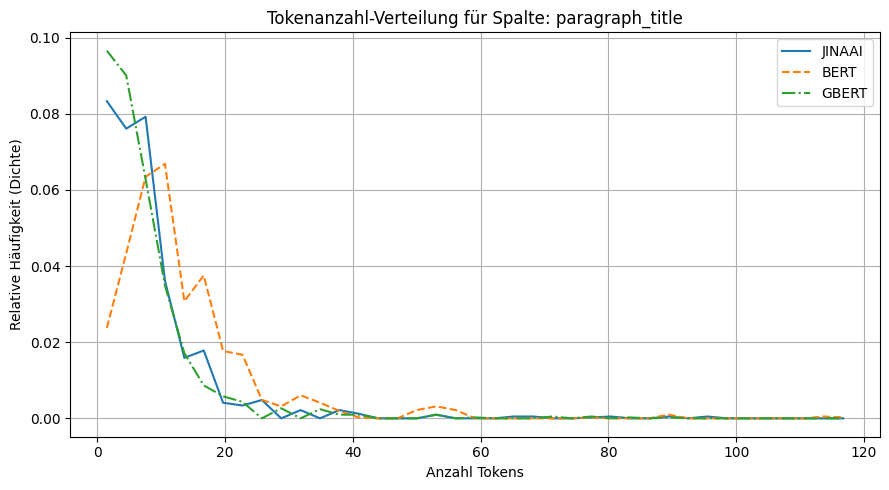

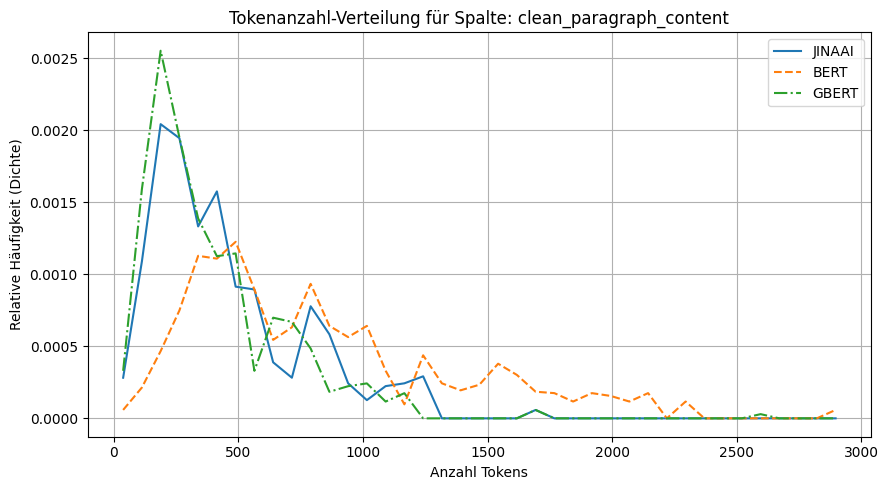

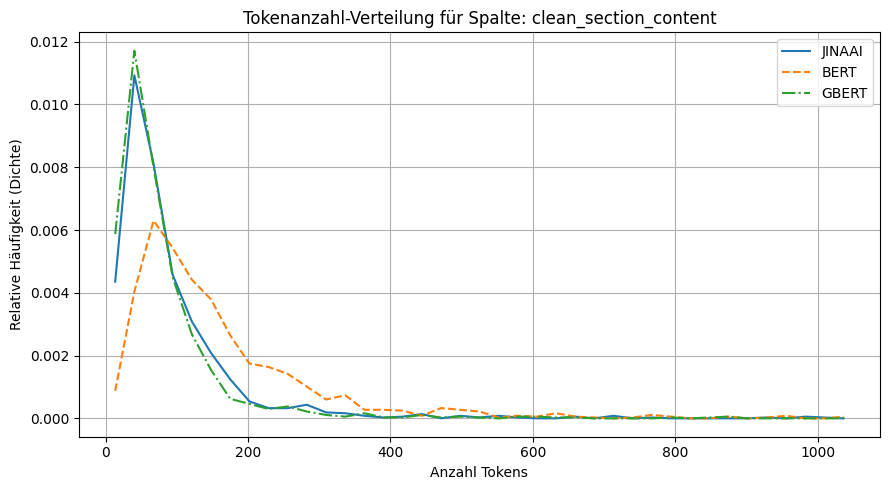

In [60]:

# Tokenizer laden
tokenizer_jina = AutoTokenizer.from_pretrained("jinaai/jina-embeddings-v3", trust_remote_code=True)
tokenizer_bert = AutoTokenizer.from_pretrained("bert-base-cased")
tokenizer_gbert = AutoTokenizer.from_pretrained("deepset/gbert-base")

# Spalten zum Analysieren
columns = ["paragraph_title", "clean_paragraph_content", "clean_section_content"]

# Tokenlängen zählen
token_counts = {"jinaai": {}, "bert": {}, "gbert": {}}
for col in columns:
    token_counts["jinaai"][col] = df[col].fillna("").apply(lambda x: len(tokenizer_jina.tokenize(x)))
    token_counts["bert"][col] = df[col].fillna("").apply(lambda x: len(tokenizer_bert.tokenize(x)))
    token_counts["gbert"][col] = df[col].fillna("").apply(lambda x: len(tokenizer_gbert.tokenize(x)))

# Plotten (nur bis zum 99%-Quantil der X-Achse)
for col in columns:
    plt.figure(figsize=(9, 5))
    max_x = max(
        token_counts["jinaai"][col].quantile(0.99),
        token_counts["bert"][col].quantile(0.99),
        token_counts["gbert"][col].quantile(0.99),
    )
    bins = np.linspace(0, max_x, 40)

    for model_name, style in zip(["jinaai", "bert", "gbert"], ['-', '--', '-.']):
        data = token_counts[model_name][col]
        hist, bin_edges = np.histogram(data, bins=bins, density=True)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        plt.plot(bin_centers, hist, label=model_name.upper(), linestyle=style)

    plt.title(f"Tokenanzahl-Verteilung für Spalte: {col}")
    plt.xlabel("Anzahl Tokens")
    plt.ylabel("Relative Häufigkeit (Dichte)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [69]:
# Tokenizer-Definition (vorausgesetzt sie wurden vorher geladen)
tokenizers = {
    "jinaai": tokenizer_jina,
    "bert": tokenizer_bert,
    "gbert": tokenizer_gbert
}


# Diese drei Spalten analysieren
columns = ["paragraph_title", "clean_paragraph_content", "clean_section_content"]

# Die Tokenanzahl für jede Spalte und Tokenizer (vorausgesetzt vorher berechnet)
# Beispielstruktur:
# token_counts = {
#     "JinaAI": {"paragraph_title": [...], ...},
#     "BERT": {"paragraph_title": [...], ...},
#     "GBERT": {"paragraph_title": [...], ...}
# }

quantile_levels = [0.90, 0.95, 0.99, 0.999]
quantile_report = {}

for name in tokenizers:
    quantile_report[name] = {}
    for col in columns:
        series = token_counts[name][col]
        quantiles = series.quantile(quantile_levels)
        quantile_report[name][col] = quantiles

# DataFrame zusammenstellen
import pandas as pd
records = []
for model_name, col_dict in quantile_report.items():
    for col, quantiles in col_dict.items():
        for q, value in quantiles.items():
            records.append({
                "Tokenizer": model_name,
                "Spalte": col,
                "Quantil": f"{int(q * 100)}%",
                "Tokenanzahl": int(value)
            })

quantile_df = pd.DataFrame(records)
quantile_df = quantile_df.sort_values(by=["Spalte", "Tokenizer", "Quantil"])
# Umstrukturieren des DataFrames: Quantile als Spalten statt Zeilen
quantile_pivot = quantile_df.pivot_table(
    index=["Tokenizer", "Spalte"],
    columns="Quantil",
    values="Tokenanzahl"
).reset_index()

# Spalten sortieren für bessere Lesbarkeit
quantile_pivot.columns.name = None
quantile_pivot = quantile_pivot[["Tokenizer", "Spalte", "90%", "95%", "99%", "99%"] if "99%" in quantile_pivot.columns else quantile_pivot.columns]

print(quantile_pivot.sort_values(by = ["Spalte","Tokenizer"]))



  Tokenizer                   Spalte     90%     95%     99%     99%
0      bert  clean_paragraph_content  1671.0  1960.0  8061.5  8061.5
3     gbert  clean_paragraph_content   800.0  1000.0  4009.0  4009.0
6    jinaai  clean_paragraph_content   895.0  1141.0  4472.0  4472.0
1      bert    clean_section_content   312.0   474.0  5354.5  5354.5
4     gbert    clean_section_content   149.0   214.0  2550.5  2550.5
7    jinaai    clean_section_content   169.0   246.0  2898.5  2898.5
2      bert          paragraph_title    24.0    36.0   473.5   473.5
5     gbert          paragraph_title    15.0    21.0   261.0   261.0
8    jinaai          paragraph_title    17.0    24.0   298.0   298.0
